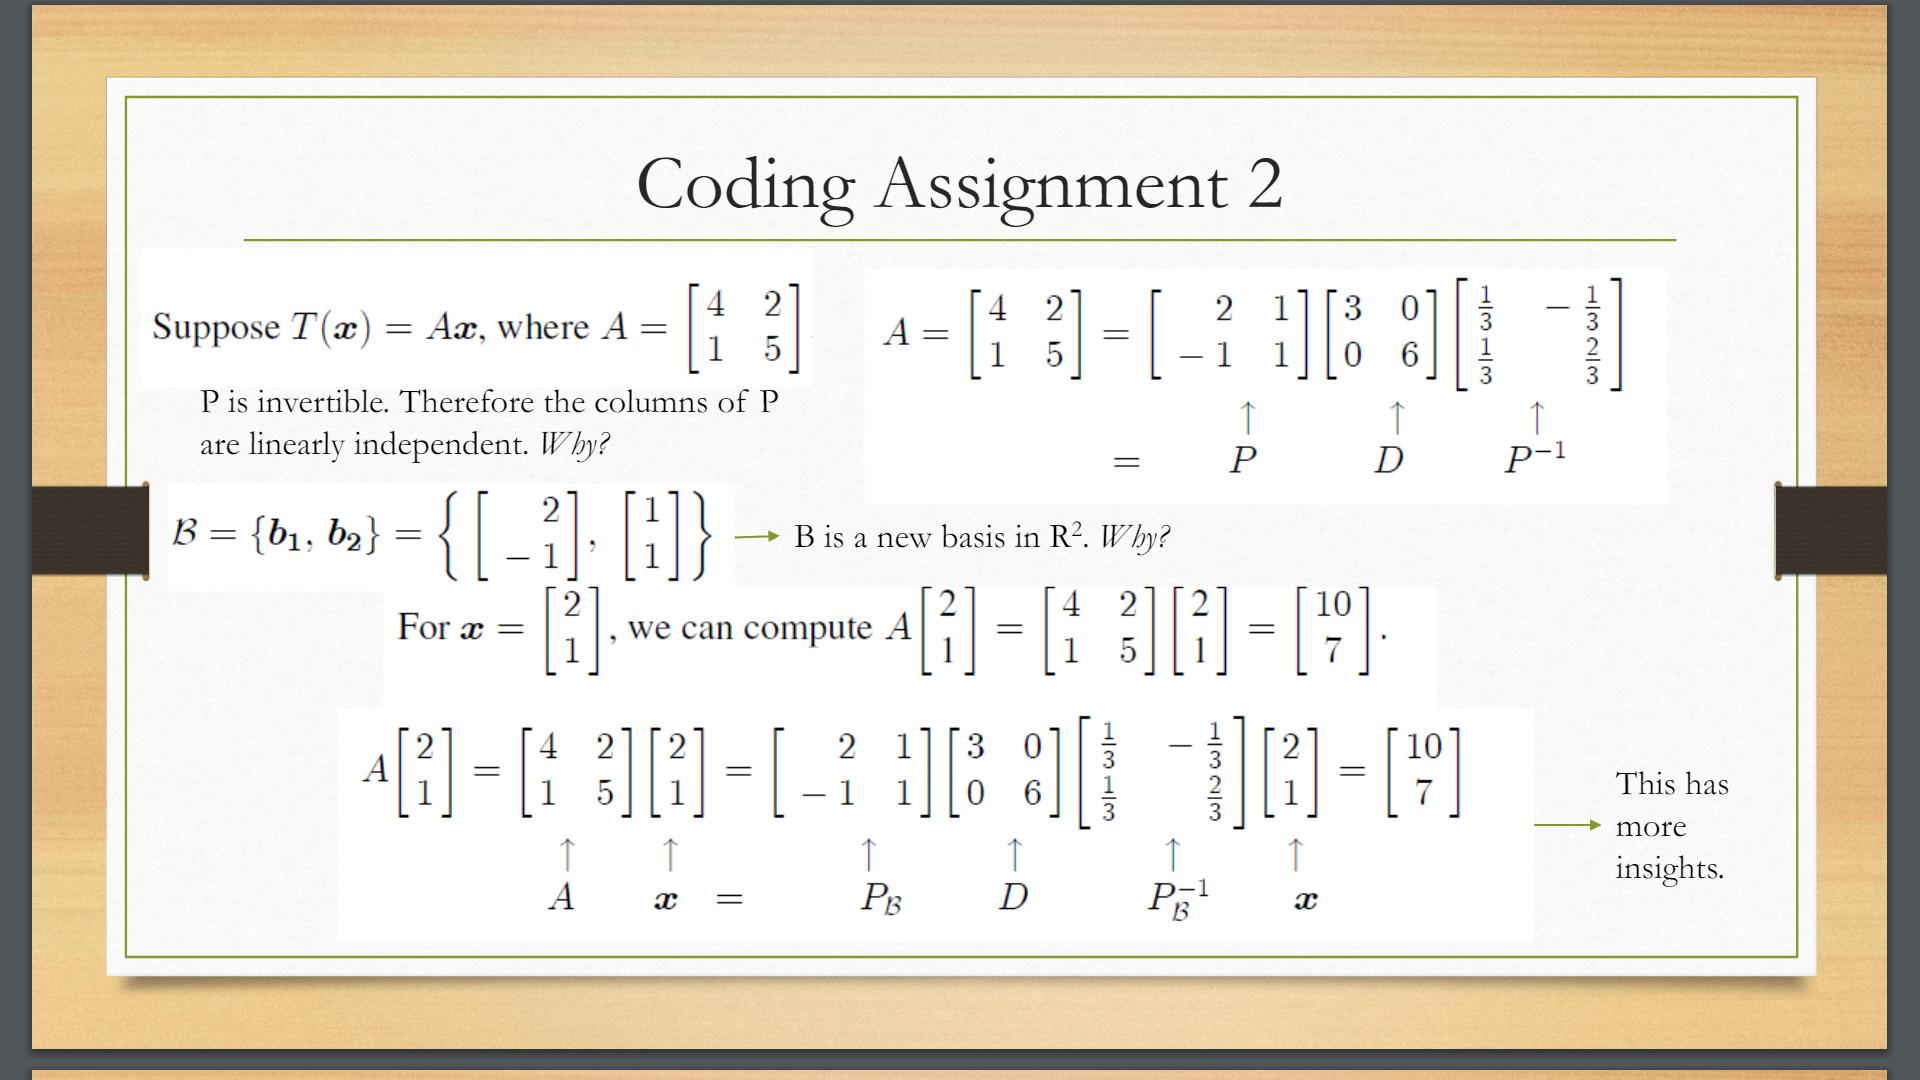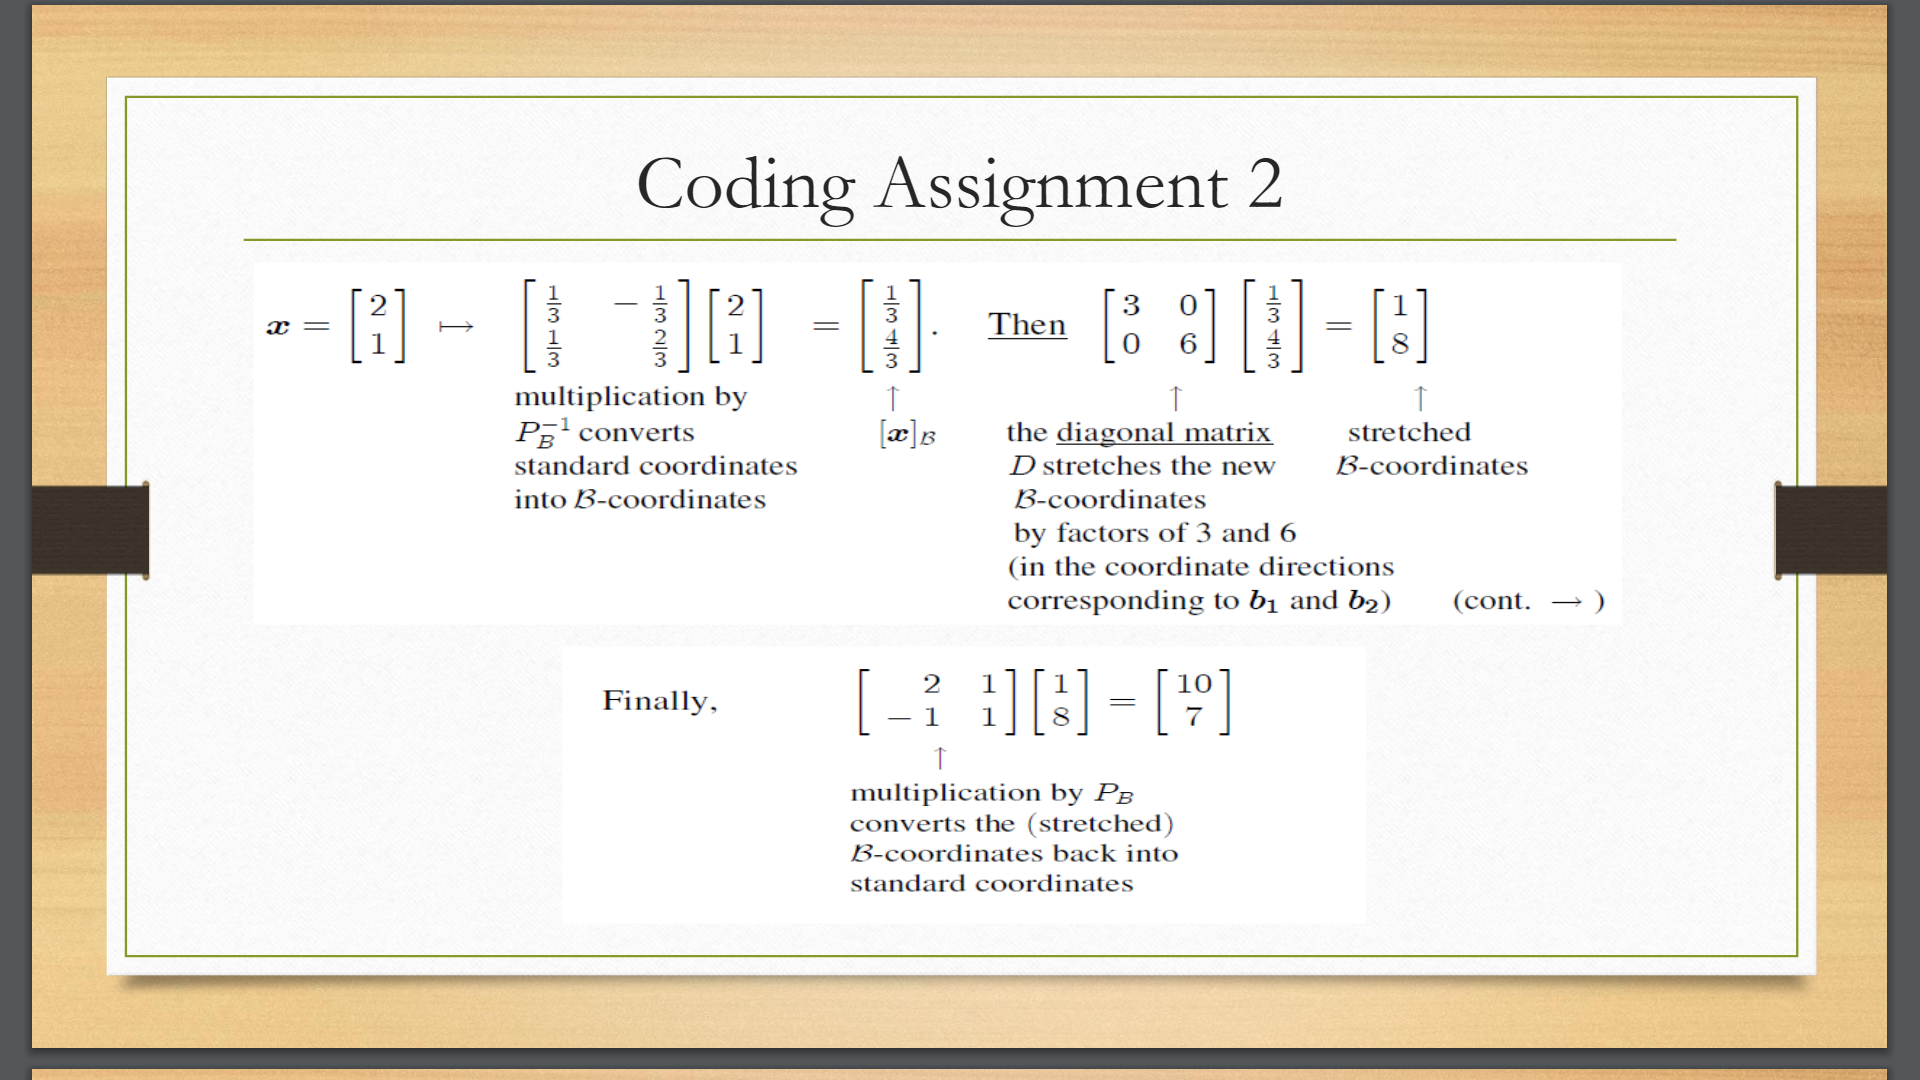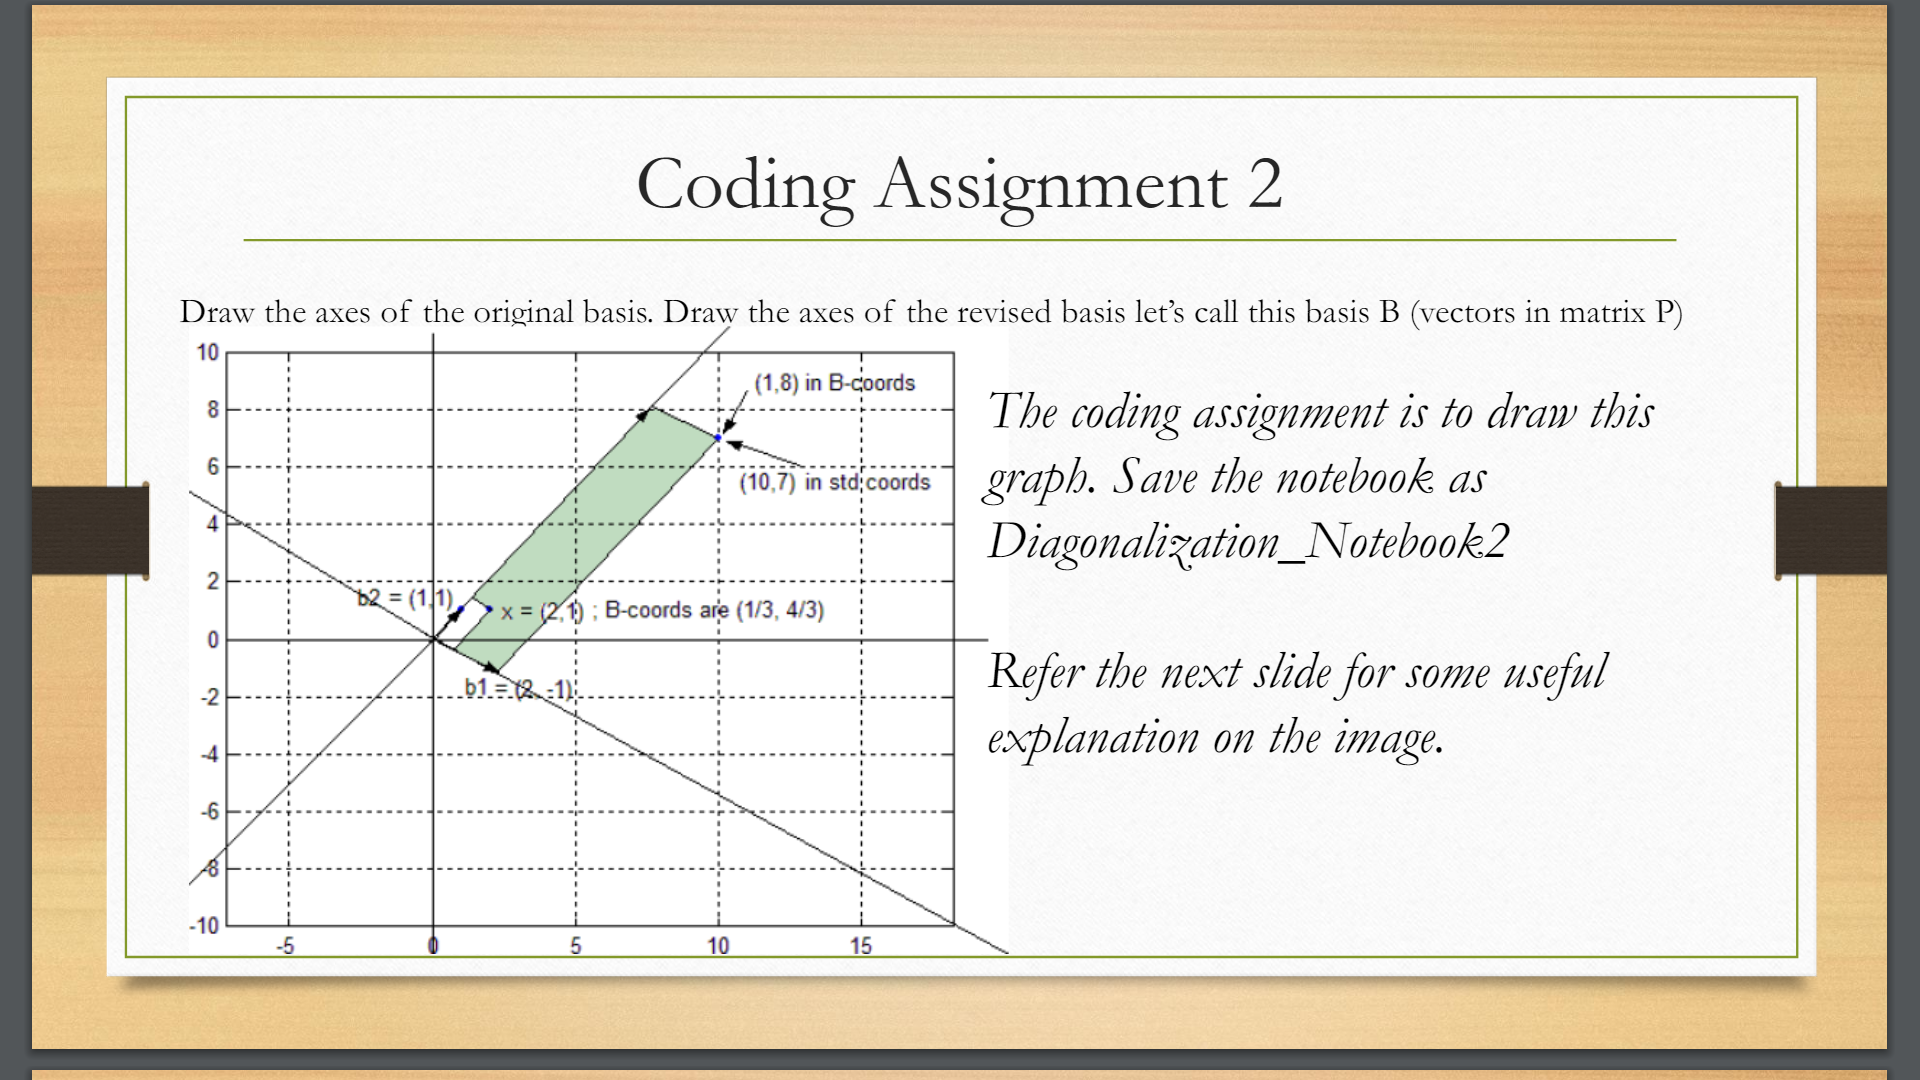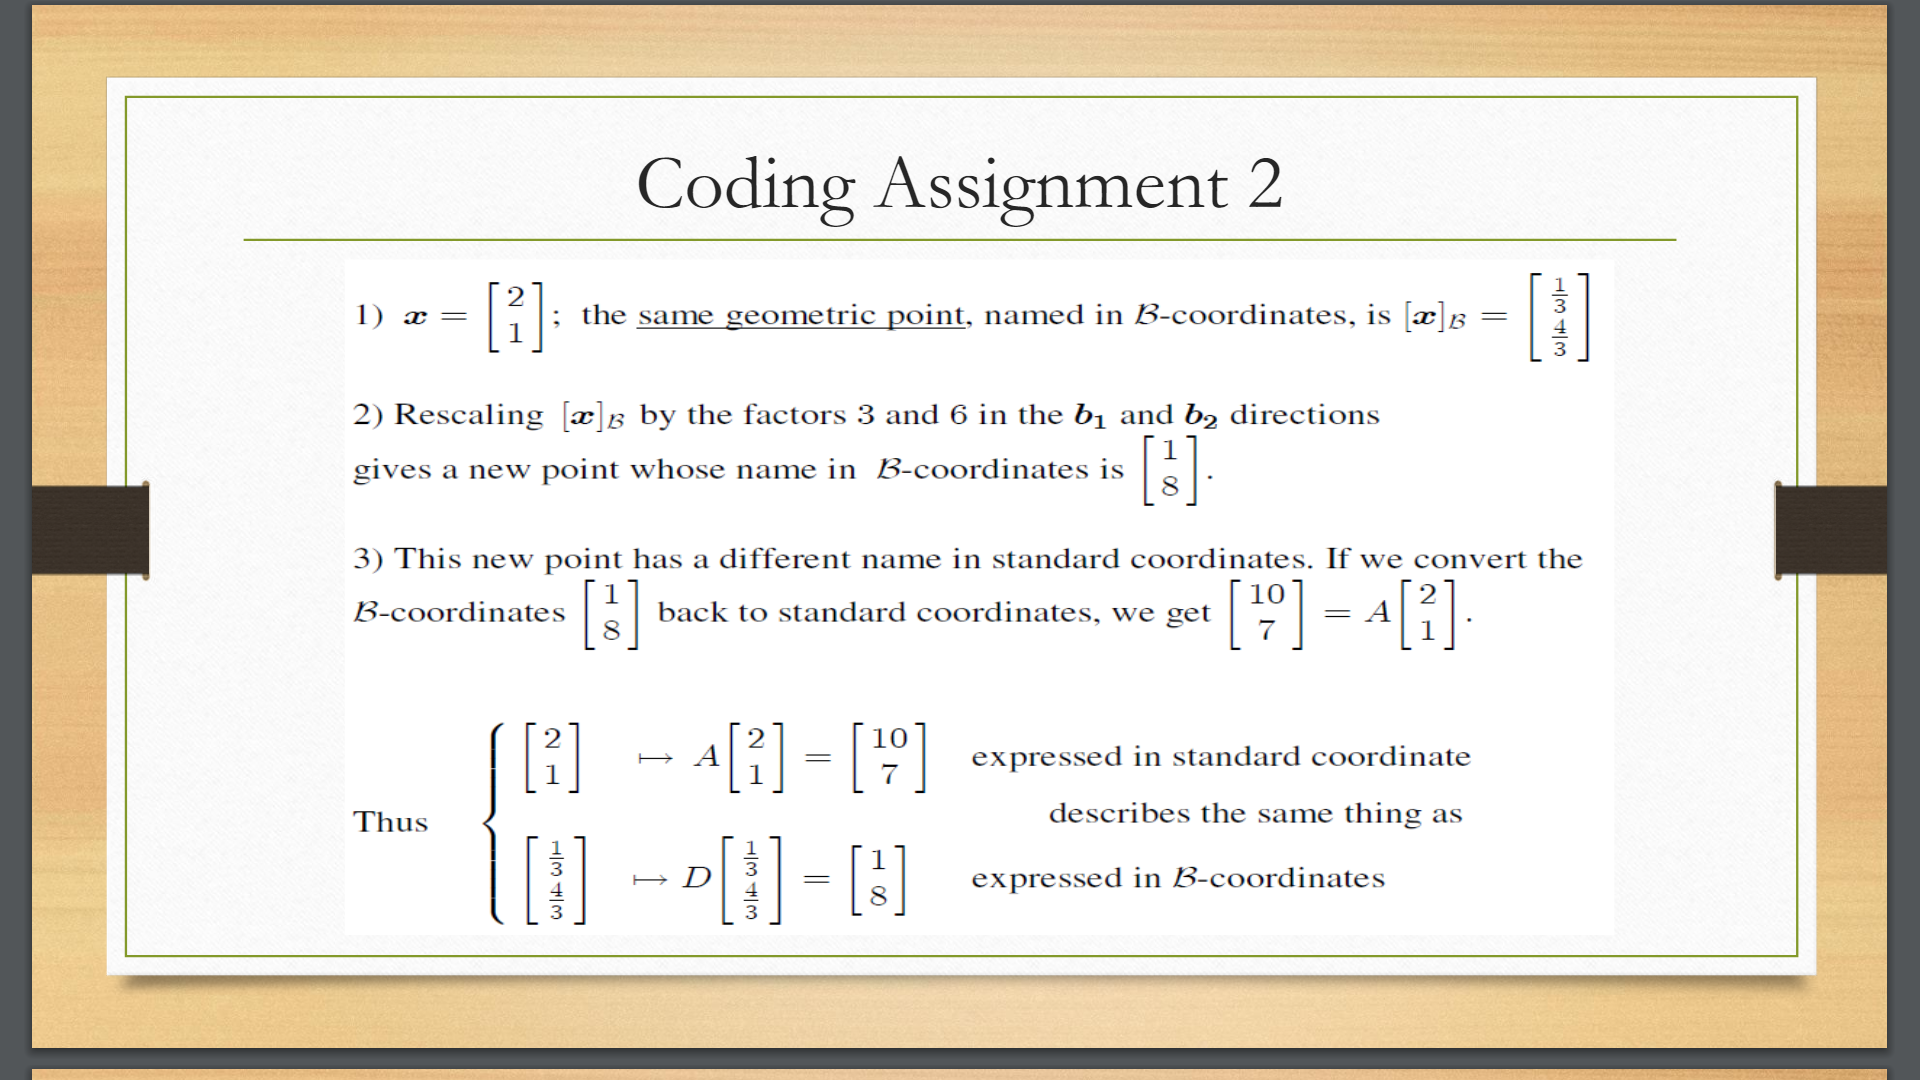

##### P is invertible.Therefore the columns of P are linearly independent.Why?
* When a matrix P is invertible, its RREF(reduced row echelon form) is an identity matrix I. 
* Since the RREF is I, it means that every column in P contains a pivot position (leading entry).
* The presence of pivot positions in every column of the RREF indicates that the columns of P are linearly independent. 
* This is because the pivot columns of the RREF correspond to linearly independent columns in P.
<hr>

##### B={b1,b2}={[2,-2],[1,1]} is a new basis in R<sup>2</sup>.Why?
B={b1,b2}={[2,-2],[1,1]} is a new basis in R<sup>2</sup> because b1 ans b2 are `linearly independent` and they `span` the entire space R<sup>2</sup>.
<hr>


#### 1. Import the necessary libraries

In [10]:
import matplotlib.pyplot as plt 
import sympy as sp
import numpy as np

#### 2. Define the function to perform Diagonalization

In [11]:
def Diagonalize(A):
    
    # find the matrices P and D using diagonalize() of sympy module
    P, D = A.diagonalize()
    print('\nMatrix P\n',P)
    print('\nMatrix D\n',D)
    P[0]=-P[0]
    P[2]=-P[2]
    print('\nMatrix P after modification\n',P)
    
    # find the P_inverse using inv() of sympy module
    P_inv = P.inv()
    print('\nMatrix P_inverse\n',P_inv)
    
    return P, D, P_inv
    

#### 3.Define the function to plot the graph

In [12]:
def plot_graph(P,D,P_inv,x): 
    
    fig, ax = plt.subplots() 
    
    # Highlight x and y axis 
    ax.axhline(color='gray') # x-axis 
    ax.axvline(color='gray') # y-axis
    
    # Extract the basis vectors b1 and b2 from matrix P
    b1 = P.col(0)    # (2,-1)
    b2 = P.col(1)    # (1,1)
    
    # find the standard coordinates
    standard_coordinates = P@D@P_inv@x     # (10,7)
    
    # find the basis coordinates
    basis_coordinates = P_inv@x            # (1/3,4/3)  
    
    # find the stretched basis coordinates
    stretched_basis_coordinates = D@basis_coordinates  # (1,8)
    
    # Plot the basis vector b1 
    ax.arrow(0,0,int(b1[0]),int(b1[1]),head_width=0.3,head_length=0.2,facecolor='red',edgecolor='red')
    ax.scatter(int(b1[0]),int(b1[1]),color='blue')
    
    # Plot the basis vector b2
    ax.arrow(0,0,int(b2[0]),int(b2[1]),head_width=0.3,head_length=0.2,facecolor='blue',edgecolor='blue')
    ax.scatter(int(b2[0]),int(b2[1]),color='blue')
    
    #Plot vector x
    ax.scatter(int(x[0]),int(x[1]),color='blue')
    
    #PLot the standard coordinates
    ax.scatter(int(standard_coordinates[0]),int(standard_coordinates[1]))
    
    # find basis_coordinates with respect to b1 and b2
    basis_coordinates_along_b1 = b1 * basis_coordinates[0]  # (2/3,-1/3)
    basis_coordinates_along_b2 = b2 * basis_coordinates[1]  # (4/3/4/3)
    
    # find stretched_basis_coordinates with respect to b1 and b2
    stretched_basis_coordinates_along_b1 = b1 * stretched_basis_coordinates[0] # (2,-1)
    stretched_basis_coordinates_along_b2 = b2 * stretched_basis_coordinates[1] # (8,8)
    
    # Plot basis_coordinates and stretched_basis_coordinates 
    
    # arrow : b2(1,1) to stretched_basis_coordinates_along_b2(8,8)
    ax.arrow(int(b2[0]),int(b2[1]),int(stretched_basis_coordinates_along_b2[0])-int(b2[0]),int(stretched_basis_coordinates_along_b2[1])-int(b2[1]),
             head_width=0.3,head_length=0.2,facecolor='green',edgecolor='green')
    
    # arrow : b1(2,-1) to standard_coordinates(10,7)
    ax.arrow(int(b1[0]),int(b1[1]),int(standard_coordinates[0])-int(b1[0]),int(standard_coordinates[1])-int(b1[1]),
            head_width=0.3,head_length=0.2)
    
    # arrow : basis_coordinates_along_b1(2/3,-1/3) to x(2,1)
    ax.arrow(float(basis_coordinates_along_b1[0]),float(basis_coordinates_along_b1[1]),
            float(x[0])-float(basis_coordinates_along_b1[0]),float(x[1])-float(basis_coordinates_along_b1[1]))
    
    # arrow : basis_coordinates_along_b2(4/3,4/3) to x(2,1)
    ax.arrow(float(basis_coordinates_along_b2[0]),float(basis_coordinates_along_b2[1]),
            float(x[0])-float(basis_coordinates_along_b2[0]),float(x[1])-float(basis_coordinates_along_b2[1]))
    
    # arrow : stretched_basis_coordinates_along_b2(8,8) to standard_coordinates(10,7) 
    ax.arrow(int(stretched_basis_coordinates_along_b2[0]),int(stretched_basis_coordinates_along_b2[1]),
            int(standard_coordinates[0])-int(stretched_basis_coordinates_along_b2[0]),
             int(standard_coordinates[1])-int(stretched_basis_coordinates_along_b2[1]))
    
    # Annotate the plots 
    # b1
    ax.annotate(f'b1={int(b1[0]),int(b1[1])}',xy=(int(b1[0]),int(b1[1])),xytext=(int(b1[0])-.5,int(b1[1])-.5))
    # b2
    ax.annotate(f'b2={int(b2[0]),int(b2[1])}',xy=(int(b2[0]),int(b2[1])),xytext=(int(b2[0])-.9,int(b2[1])+.9))
    # x = (2,1) and b-coords = (1/3,4/3)
    ax.annotate(f'x={int(x[0]),int(x[1])};B-coords are {round(float(basis_coordinates[0]),2),round(float(basis_coordinates[1]),2)}',
                xy=(int(x[0]),int(x[1])),xytext=(int(x[0])+.3,int(x[1])))
    # standard_coordinates = (10,7) 
    ax.annotate(f'{int(standard_coordinates[0]),int(standard_coordinates[1])} in std coordinates',
                xy=(int(standard_coordinates[0]),int(standard_coordinates[1])),
                xytext=(int(standard_coordinates[0])+.9,int(standard_coordinates[1])-.9),
                arrowprops=dict(arrowstyle='->'))
    # stretched_basis_coordinates = (1,8)
    ax.annotate(f'{int(stretched_basis_coordinates[0]),int(stretched_basis_coordinates[1])} in B-coords',
                xy=(int(standard_coordinates[0]),int(standard_coordinates[1])),
                xytext=(int(standard_coordinates[0])-.9,int(standard_coordinates[1])+.9),
                arrowprops=dict(arrowstyle='->'))
    
    # Extend b1 and b2
    # b2 in positive y direction
    b2_positive_y_axis = 15*b2 # (15,15)
    b2_positive_y_axis_x_points = np.array([int(stretched_basis_coordinates_along_b2[0]),int(b2_positive_y_axis[0])])
    b2_positive_y_axis_y_points = np.array([int(stretched_basis_coordinates_along_b2[1]),int(b2_positive_y_axis[1])])
    ax.plot(b2_positive_y_axis_x_points,b2_positive_y_axis_y_points,color='black')
    
    # b2 in negative y direction
    b2_negative_y_axis = -5*b2 # (-5,-5)
    b2_negative_y_axis_x_points = np.array([0,int(b2_negative_y_axis[0])])
    b2_negative_y_axis_y_points = np.array([0,int(b2_negative_y_axis[1])])
    ax.plot(b2_negative_y_axis_x_points,b2_negative_y_axis_y_points,color='black')
    
    # b1 in positive x direction
    b1_positive_x_axis = 15*b1 # (30,-15)
    b1_positive_x_axis_x_points = np.array([int(b1[0]),int(b1_positive_x_axis[0])])
    b1_positive_x_axis_y_points = np.array([int(b1[1]),int(b1_positive_x_axis[1])])
    ax.plot(b1_positive_x_axis_x_points,b1_positive_x_axis_y_points,color='black')
    
    # b1 in negative x direction
    b1_negative_x_axis = -5*b1 # (-10,5)
    b1_negative_x_axis_x_points = np.array([0,int(b1_negative_x_axis[0])])
    b1_negative_x_axis_y_points = np.array([0,int(b1_negative_x_axis[1])])
    ax.plot(b1_negative_x_axis_x_points,b1_negative_x_axis_y_points,color='black')
    
    # set x and y limit
    ax.set_xlim(-5,15)
    ax.set_ylim(-5,15)
    
    # display the graph
    plt.grid(linestyle='--')
    plt.show()

#### 4.Perform Diagonalization

In [13]:
# Define the matrix A
A = sp.Matrix([[4,2],
              [1,5]])
print('\nMatrix A\n',A)

# Define the vecotr x
x = sp.Matrix([[2],[1]])
print('\nVector x\n',x)

# Perform diagonalization 
P, D, P_inv = Diagonalize(A)


Matrix A
 Matrix([[4, 2], [1, 5]])

Vector x
 Matrix([[2], [1]])

Matrix P
 Matrix([[-2, 1], [1, 1]])

Matrix D
 Matrix([[3, 0], [0, 6]])

Matrix P after modification
 Matrix([[2, 1], [-1, 1]])

Matrix P_inverse
 Matrix([[1/3, -1/3], [1/3, 2/3]])


#### 5.Plot the given graph

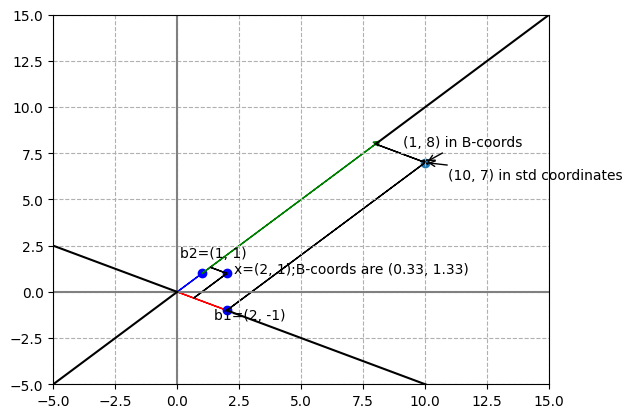

In [14]:
plot_graph(P,D,P_inv,x)